#**Fashion MNIST CNN Model!**

In [24]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [25]:
%matplotlib inline

##**Data Collection & Processing**

In [26]:
transform = transforms.ToTensor()

In [27]:
train_data = datasets.FashionMNIST(root = "data", train = True, transform = transform, download = True)
test_data = datasets.FashionMNIST(root = "data", train = False, transform = transform, download = True)

In [28]:
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = True)

In [29]:
print(train_data[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

##**Creating the CNN Model!**

In [30]:
class CNN(nn.Module):

  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)

    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 84)
    self.fc4 = nn.Linear(84, 84)
    self.fc5 = nn.Linear(84, 10)

  def feedForward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)

    X = X.view(-1, 16 * 5 * 5)

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = F.relu(self.fc3(X))
    X = F.relu(self.fc4(X))
    X = self.fc5(X)

    return F.log_softmax(X, dim = 1)

In [31]:
torch.manual_seed(71)

In [32]:
model = CNN()

In [33]:
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=84, bias=True)
  (fc5): Linear(in_features=84, out_features=10, bias=True)
)

##**Training the Model**

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [35]:
import time

start_time = time.time()

epochs : int = 5
train_losses : int = []
test_losses : int = []
train_correct : int = []
test_correct : int = []

i : int = 1
while i <= 5:
  train_corr = 0
  test_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1

    y_pred = model.feedForward(X_train)
    loss = criterion(y_pred, y_train)
    predicted = torch.max(y_pred.data, 1)[1]

    batch_corr : int = (predicted == y_train).sum()
    train_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (b + 1) % 100 == 0:
      print(f"Epoch : {i}, Batch : {b + 1}, Loss : {loss.item()}")

  train_losses.append(loss)
  train_correct.append(train_corr)

  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model.feedForward(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      test_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(test_corr)

  i += 1

current_time = time.time()
print(f"Time taken to train the model : {current_time - start_time}")

Epoch : 1, Batch : 100, Loss : 1.190028429031372
Epoch : 1, Batch : 200, Loss : 1.2111515998840332
Epoch : 1, Batch : 300, Loss : 1.1931861639022827
Epoch : 1, Batch : 400, Loss : 0.7018818855285645
Epoch : 1, Batch : 500, Loss : 0.5468412637710571
Epoch : 1, Batch : 600, Loss : 0.7733075022697449
Epoch : 1, Batch : 700, Loss : 0.46719661355018616
Epoch : 1, Batch : 800, Loss : 0.7298765182495117
Epoch : 1, Batch : 900, Loss : 0.7305834293365479
Epoch : 1, Batch : 1000, Loss : 0.9990125894546509
Epoch : 1, Batch : 1100, Loss : 0.3111301064491272
Epoch : 1, Batch : 1200, Loss : 0.7091071009635925
Epoch : 1, Batch : 1300, Loss : 0.474865198135376
Epoch : 1, Batch : 1400, Loss : 0.43359747529029846
Epoch : 1, Batch : 1500, Loss : 1.263570785522461
Epoch : 1, Batch : 1600, Loss : 0.9576774835586548
Epoch : 1, Batch : 1700, Loss : 0.7074729204177856
Epoch : 1, Batch : 1800, Loss : 0.34448719024658203
Epoch : 1, Batch : 1900, Loss : 0.48812389373779297
Epoch : 1, Batch : 2000, Loss : 0.58778

##**Plotting the results**

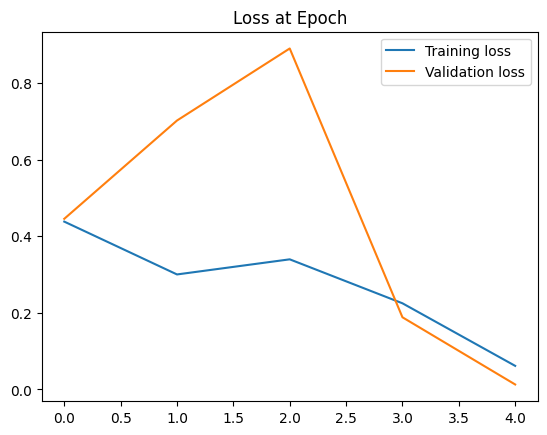

In [36]:
# plotting the results
train_losses = [tl.item() for tl in train_losses]

plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Validation loss")
plt.title("Loss at Epoch")
plt.legend()

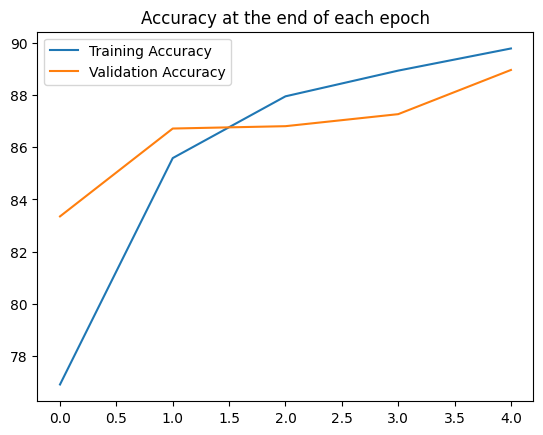

In [37]:
plt.plot([t / 600 for t in train_correct], label = "Training Accuracy")
plt.plot([t / 100 for t in test_correct], label = "Validation Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()

##**Finding the Accuracy!**

In [38]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in DataLoader(test_data, batch_size = 10000, shuffle = False):
    y_pred = model.feedForward(X_test)
    predicted = torch.max(y_pred, 1)[1]
    correct += (predicted == y_test).sum()

In [39]:
# Accuracy
print(f"Accuracy : {correct.item() / len(test_data) * 100}%")

Accuracy : 88.94999999999999%


##**Testing using an image**

In [50]:
labels : dict = {"0" : "T-shirt/top",
                 "1" :	"Trouser",
                 "2" : "Pullover",
                 "3" : "Dress",
                 "4" : "Coat",
                 "5" : "Sandal",
                 "6" :	"Shirt",
                 "7" : "Sneaker",
                 "8" :	"Bag",
                 "9" : "Ankle boot"
                 }

In [76]:
test_data_num : int = 2023

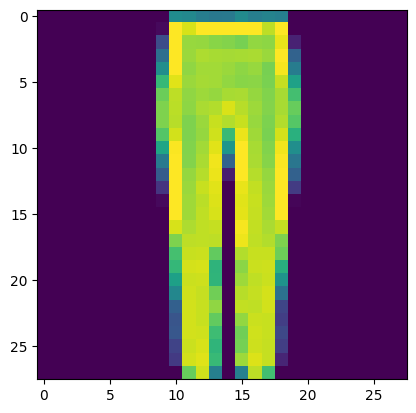

In [77]:
plt.imshow(test_data[test_data_num][0].reshape(28,28))

In [78]:
model.eval()
with torch.no_grad():
  prediction = model.feedForward(test_data[test_data_num][0].view(1, 1, 28, 28))

print(f"Prediction : {labels[str(prediction.argmax().item())]}")

Prediction : Trouser


##**Saving the model**

In [80]:
torch.save(model.state_dict(), "FashionMNIST_CNN_Model.pt")